# MovieLens Dataset Analysis - Stage 1: Feature Engineering & Exploration

This notebook performs data preparation, feature engineering, and exploratory data analysis on the MovieLens dataset, HNG intership Task 1

**Author:** [Adu Morenikeji Toluwalope]  
**Date:** October 2025  
**Dataset:** MovieLens ml-latest-small

## 1. Data Preparation

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Load the datasets
ratings = pd.read_csv('ml-latest-small/ratings.csv')
movies = pd.read_csv('ml-latest-small/movies.csv')
tags = pd.read_csv('ml-latest-small/tags.csv')
links = pd.read_csv('ml-latest-small/links.csv')

print("Dataset shapes:")
print(f"Ratings: {ratings.shape}")
print(f"Movies: {movies.shape}")
print(f"Tags: {tags.shape}")
print(f"Links: {links.shape}")

Dataset shapes:
Ratings: (100836, 4)
Movies: (9742, 3)
Tags: (3683, 4)
Links: (9742, 3)


In [3]:
# Display basic information about the datasets
print(" RATINGS DATASET ")
print(ratings.head())
print("\nInfo:")
print(ratings.info())

print("\n MOVIES DATASET ")
print(movies.head())
print("\nInfo:")
print(movies.info())

 RATINGS DATASET 
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None

 MOVIES DATASET 
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                 

In [4]:
# Check for duplicates and missing values
print(" DATA QUALITY CHECK ")
print("\nDuplicates:")
print(f"Ratings duplicates: {ratings.duplicated().sum()}")
print(f"Movies duplicates: {movies.duplicated().sum()}")

print("\nMissing values:")
print("Ratings:")
print(ratings.isnull().sum())
print("\nMovies:")
print(movies.isnull().sum())

 DATA QUALITY CHECK 

Duplicates:
Ratings duplicates: 0
Movies duplicates: 0

Missing values:
Ratings:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Movies:
movieId    0
title      0
genres     0
dtype: int64


In [5]:
# Merge ratings and movies datasets
df = pd.merge(ratings, movies, on='movieId', how='inner')
print(f"Merged dataset shape: {df.shape}")
print("\nMerged dataset sample:")
print(df.head())

Merged dataset shape: (100836, 6)

Merged dataset sample:
   userId  movieId  rating  timestamp                        title  \
0       1        1     4.0  964982703             Toy Story (1995)   
1       1        3     4.0  964981247      Grumpier Old Men (1995)   
2       1        6     4.0  964982224                  Heat (1995)   
3       1       47     5.0  964983815  Seven (a.k.a. Se7en) (1995)   
4       1       50     5.0  964982931   Usual Suspects, The (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                               Comedy|Romance  
2                        Action|Crime|Thriller  
3                             Mystery|Thriller  
4                       Crime|Mystery|Thriller  


In [6]:
# Convert timestamp to datetime
df['datetime'] = pd.to_datetime(df['timestamp'], unit='s')
print("Timestamp converted to datetime format")
print(f"Date range: {df['datetime'].min()} to {df['datetime'].max()}")

Timestamp converted to datetime format
Date range: 1996-03-29 18:36:55 to 2018-09-24 14:27:30


## 2. Feature Engineering

Creating at least 6 new features to enhance the dataset for analysis and future recommendation systems.

In [7]:
# Feature 1: Extract release year from movie title
def extract_year(title):
    """Extract year from movie title (assumes format: Title (YYYY))"""
    try:
        year = title.split('(')[-1].split(')')[0]
        if year.isdigit() and len(year) == 4:
            return int(year)
        return None
    except:
        return None

df['release_year'] = df['title'].apply(extract_year)
print(f"Feature 1 - Release Year: {df['release_year'].notna().sum()} movies with valid years")
print(f"Year range: {df['release_year'].min()} to {df['release_year'].max()}")

Feature 1 - Release Year: 100818 movies with valid years
Year range: 1902.0 to 2018.0


In [8]:
# Feature 2: Count number of genres per movie
df['genre_count'] = df['genres'].apply(lambda x: len(x.split('|')) if x != '(no genres listed)' else 0)
print(f"Feature 2 - Genre Count: Range from {df['genre_count'].min()} to {df['genre_count'].max()} genres per movie")
print(f"Average genres per movie: {df['genre_count'].mean():.2f}")

Feature 2 - Genre Count: Range from 0 to 10 genres per movie
Average genres per movie: 2.72


In [9]:
# Feature 3: Movie age at time of rating
df['rating_year'] = df['datetime'].dt.year
df['movie_age_at_rating'] = df['rating_year'] - df['release_year']
print(f"Feature 3 - Movie Age at Rating: Range from {df['movie_age_at_rating'].min()} to {df['movie_age_at_rating'].max()} years")
print(f"Average movie age at rating: {df['movie_age_at_rating'].mean():.2f} years")

Feature 3 - Movie Age at Rating: Range from -1.0 to 116.0 years
Average movie age at rating: 13.28 years


In [10]:
# Feature 4: Rating time features (hour, day of week, month)
df['rating_hour'] = df['datetime'].dt.hour
df['rating_day_of_week'] = df['datetime'].dt.dayofweek  # 0=Monday, 6=Sunday
df['rating_month'] = df['datetime'].dt.month

print("Feature 4 - Temporal Features:")
print(f"Rating hours range: {df['rating_hour'].min()} to {df['rating_hour'].max()}")
print(f"Most common rating hour: {df['rating_hour'].mode().iloc[0]}")
print(f"Most common rating day: {df['rating_day_of_week'].mode().iloc[0]} (0=Monday)")

Feature 4 - Temporal Features:
Rating hours range: 0 to 23
Most common rating hour: 20
Most common rating day: 0 (0=Monday)


In [11]:
# Feature 5: Movie popularity (number of ratings received)
movie_popularity = df.groupby('movieId')['rating'].count().reset_index()
movie_popularity.columns = ['movieId', 'popularity_score']
df = pd.merge(df, movie_popularity, on='movieId', how='left')

print(f"Feature 5 - Movie Popularity: Range from {df['popularity_score'].min()} to {df['popularity_score'].max()} ratings")
print(f"Average ratings per movie: {df['popularity_score'].mean():.2f}")

Feature 5 - Movie Popularity: Range from 1 to 329 ratings
Average ratings per movie: 58.76


In [12]:
# Feature 6: Average rating per movie
movie_avg_rating = df.groupby('movieId')['rating'].mean().reset_index()
movie_avg_rating.columns = ['movieId', 'avg_movie_rating']
df = pd.merge(df, movie_avg_rating, on='movieId', how='left')

print(f"Feature 6 - Average Movie Rating: Range from {df['avg_movie_rating'].min():.2f} to {df['avg_movie_rating'].max():.2f}")
print(f"Overall average rating: {df['avg_movie_rating'].mean():.2f}")

Feature 6 - Average Movie Rating: Range from 0.50 to 5.00
Overall average rating: 3.50


In [13]:
# Feature 7: User activity level (bonus feature)
user_activity = df.groupby('userId')['rating'].count().reset_index()
user_activity.columns = ['userId', 'user_activity_level']
df = pd.merge(df, user_activity, on='userId', how='left')

print(f"Feature 7 - User Activity Level: Range from {df['user_activity_level'].min()} to {df['user_activity_level'].max()} ratings")
print(f"Average ratings per user: {df['user_activity_level'].mean():.2f}")

Feature 7 - User Activity Level: Range from 20 to 2698 ratings
Average ratings per user: 603.89


In [14]:
# Feature 8: Decade categorization (bonus feature)
def categorize_decade(year):
    """Categorize movies by decade"""
    if pd.isna(year):
        return 'Unknown'
    elif year < 1950:
        return 'Pre-1950'
    elif year < 1960:
        return '1950s'
    elif year < 1970:
        return '1960s'
    elif year < 1980:
        return '1970s'
    elif year < 1990:
        return '1980s'
    elif year < 2000:
        return '1990s'
    elif year < 2010:
        return '2000s'
    else:
        return '2010s+'

df['decade'] = df['release_year'].apply(categorize_decade)

print(f"Feature 8 - Decade Categories:")
print(df['decade'].value_counts().sort_index())

# Display final dataset info
print(f"\n FINAL DATASET SUMMARY")
print(f"Total records: {len(df):,}")
print(f"Total features: {len(df.columns)}")
print(f"New features created: 8")
print("\nNew features:")
print("1. release_year - Year movie was released")
print("2. genre_count - Number of genres per movie")
print("3. movie_age_at_rating - Movie age when rated")
print("4. rating_hour/day_of_week/month - Temporal rating features")
print("5. popularity_score - Number of ratings per movie")
print("6. avg_movie_rating - Average rating per movie")
print("7. user_activity_level - Number of ratings per user")
print("8. decade - Movie decade category")

# Save the enhanced dataset
df.to_csv('enhanced_movielens_dataset.csv', index=False)
print("\nEnhanced dataset saved as 'enhanced_movielens_dataset.csv'")

Feature 8 - Decade Categories:
decade
1950s        1784
1960s        2858
1970s        4995
1980s       12912
1990s       37087
2000s       29766
2010s+       9487
Pre-1950     1929
Unknown        18
Name: count, dtype: int64

 FINAL DATASET SUMMARY
Total records: 100,836
Total features: 18
New features created: 8

New features:
1. release_year - Year movie was released
2. genre_count - Number of genres per movie
3. movie_age_at_rating - Movie age when rated
4. rating_hour/day_of_week/month - Temporal rating features
5. popularity_score - Number of ratings per movie
6. avg_movie_rating - Average rating per movie
7. user_activity_level - Number of ratings per user
8. decade - Movie decade category

Enhanced dataset saved as 'enhanced_movielens_dataset.csv'


## 3. Exploratory Data Analysis

Now let's explore the data to uncover interesting patterns and insights.

In [15]:
# Basic statistics
print("BASIC STATISTICS")
print(f"Total users: {df['userId'].nunique():,}")
print(f"Total movies: {df['movieId'].nunique():,}")
print(f"Total ratings: {len(df):,}")
print(f"Rating scale: {df['rating'].min()} to {df['rating'].max()}")
print(f"Average rating: {df['rating'].mean():.2f}")
print(f"Rating standard deviation: {df['rating'].std():.2f}")

BASIC STATISTICS
Total users: 610
Total movies: 9,724
Total ratings: 100,836
Rating scale: 0.5 to 5.0
Average rating: 3.50
Rating standard deviation: 1.04


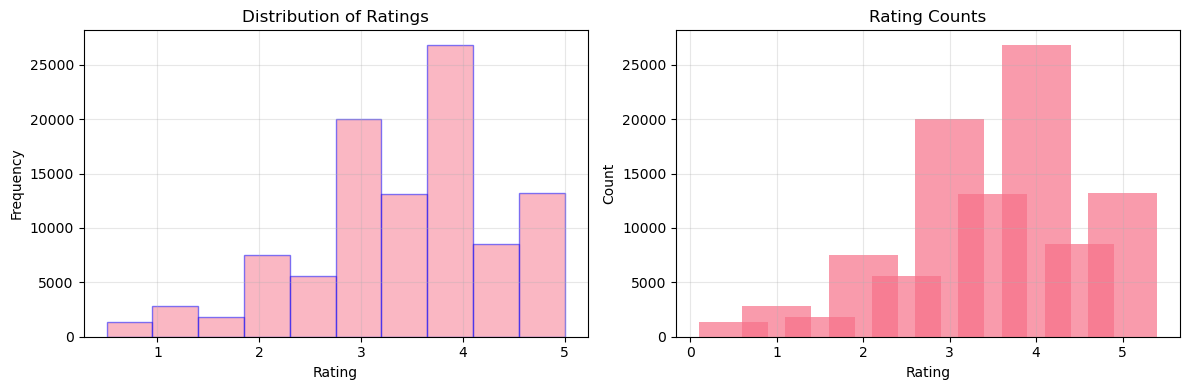

Rating distribution:
rating
0.5     1370
1.0     2811
1.5     1791
2.0     7551
2.5     5550
3.0    20047
3.5    13136
4.0    26818
4.5     8551
5.0    13211
Name: count, dtype: int64


In [16]:
# Rating distribution
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
df['rating'].hist(bins=10, edgecolor='blue', alpha=0.5)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
rating_counts = df['rating'].value_counts().sort_index()
plt.bar(rating_counts.index, rating_counts.values, alpha=0.7)
plt.title('Rating Counts')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Rating distribution:")
print(rating_counts)

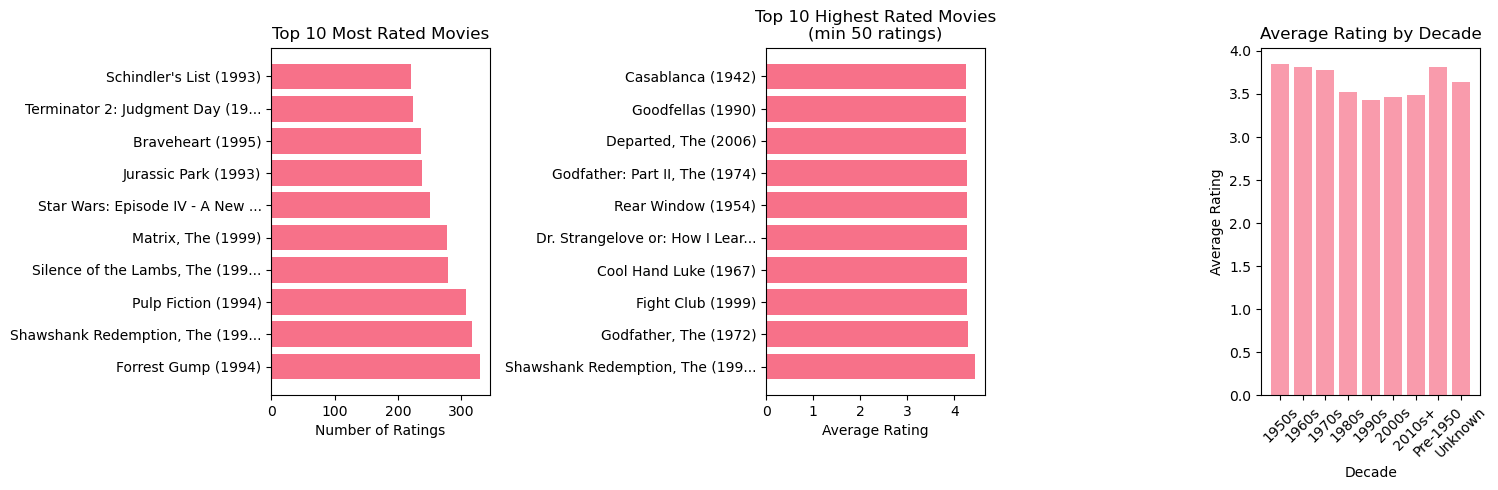

In [17]:
# Movie popularity analysis
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
top_movies = df.groupby('title')['rating'].count().sort_values(ascending=False).head(10)
plt.barh(range(len(top_movies)), top_movies.values)
plt.yticks(range(len(top_movies)), [title[:30] + '...' if len(title) > 30 else title for title in top_movies.index])
plt.title('Top 10 Most Rated Movies')
plt.xlabel('Number of Ratings')

plt.subplot(1, 3, 2)
top_rated = df.groupby('title').agg({'rating': ['mean', 'count']}).reset_index()
top_rated.columns = ['title', 'avg_rating', 'count']
top_rated = top_rated[top_rated['count'] >= 50].sort_values('avg_rating', ascending=False).head(10)
plt.barh(range(len(top_rated)), top_rated['avg_rating'])
plt.yticks(range(len(top_rated)), [title[:30] + '...' if len(title) > 30 else title for title in top_rated['title']])
plt.title('Top 10 Highest Rated Movies\n(min 50 ratings)')
plt.xlabel('Average Rating')

plt.subplot(1, 3, 3)
decade_ratings = df.groupby('decade')['rating'].mean().sort_index()
plt.bar(decade_ratings.index, decade_ratings.values, alpha=0.7)
plt.title('Average Rating by Decade')
plt.xlabel('Decade')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

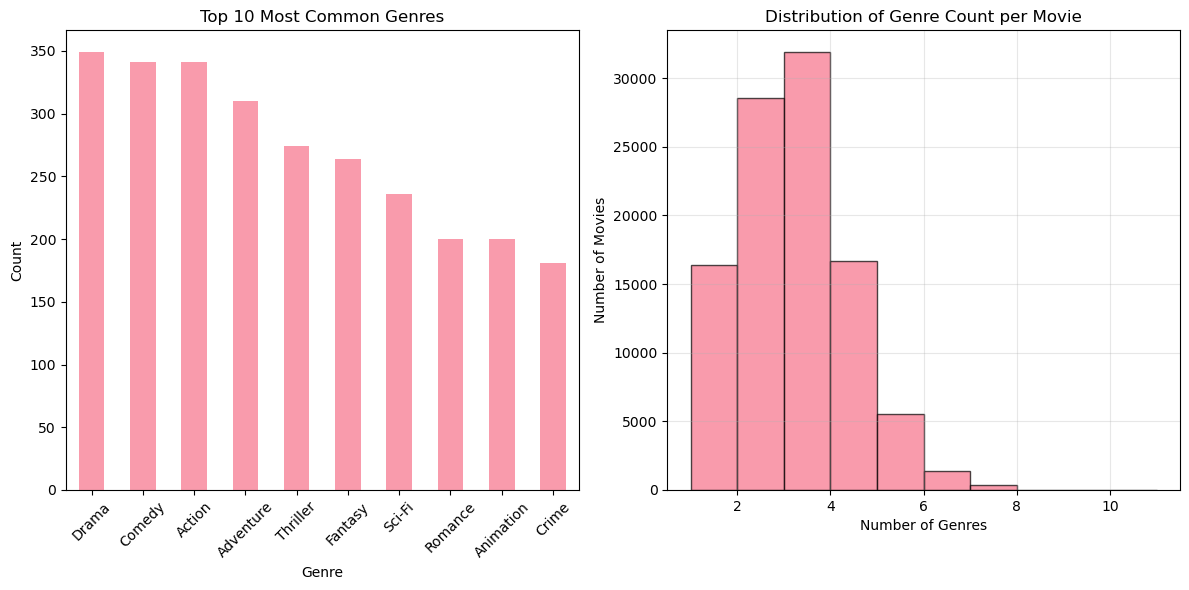

Most common genre: Drama (349 movies)
Average genres per movie: 2.72


In [18]:
# Genre analysis
all_genres = []
for genres in df['genres'].unique():
    if genres != '(no genres listed)':
        all_genres.extend(genres.split('|'))

genre_counts = pd.Series(all_genres).value_counts()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
genre_counts.head(10).plot(kind='bar', alpha=0.7)
plt.title('Top 10 Most Common Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
df['genre_count'].hist(bins=range(1, df['genre_count'].max()+2), alpha=0.7, edgecolor='black')
plt.title('Distribution of Genre Count per Movie')
plt.xlabel('Number of Genres')
plt.ylabel('Number of Movies')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Most common genre: {genre_counts.index[0]} ({genre_counts.iloc[0]} movies)")
print(f"Average genres per movie: {df['genre_count'].mean():.2f}")

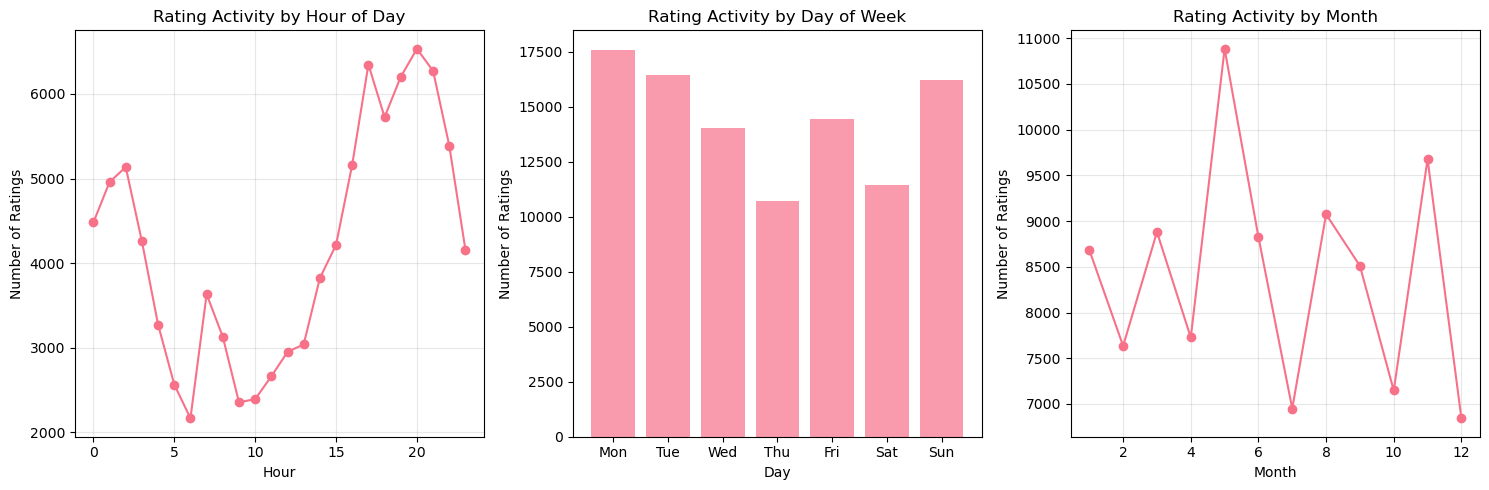

In [19]:
# Temporal patterns
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
hourly_ratings = df.groupby('rating_hour')['rating'].count()
plt.plot(hourly_ratings.index, hourly_ratings.values, marker='o')
plt.title('Rating Activity by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Ratings')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
daily_ratings = df.groupby('rating_day_of_week')['rating'].count()
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.bar(range(7), daily_ratings.values, alpha=0.7)
plt.xticks(range(7), days)
plt.title('Rating Activity by Day of Week')
plt.xlabel('Day')
plt.ylabel('Number of Ratings')

plt.subplot(1, 3, 3)
monthly_ratings = df.groupby('rating_month')['rating'].count()
plt.plot(monthly_ratings.index, monthly_ratings.values, marker='o')
plt.title('Rating Activity by Month')
plt.xlabel('Month')
plt.ylabel('Number of Ratings')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

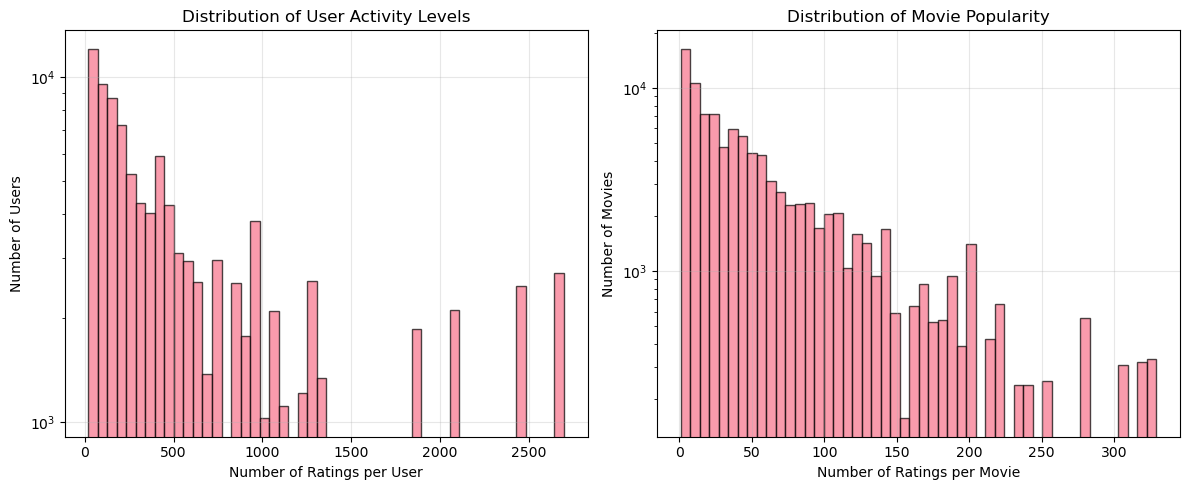

Most active user rated 2698 movies
Most popular movie has 329 ratings


In [20]:
# User behavior analysis
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['user_activity_level'], bins=50, alpha=0.7, edgecolor='black')
plt.title('Distribution of User Activity Levels')
plt.xlabel('Number of Ratings per User')
plt.ylabel('Number of Users')
plt.yscale('log')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(df['popularity_score'], bins=50, alpha=0.7, edgecolor='black')
plt.title('Distribution of Movie Popularity')
plt.xlabel('Number of Ratings per Movie')
plt.ylabel('Number of Movies')
plt.yscale('log')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Most active user rated {df['user_activity_level'].max()} movies")
print(f"Most popular movie has {df['popularity_score'].max()} ratings")

## 4. Key Insights and Findings

Based on our exploratory data analysis, here are the key insights discovered:

In [21]:
# Generate key insights
print(" 6 KEY INSIGHTS FROM MOVIELENS DATASET ANALYSIS ")
print()

# Insight 1: Rating Distribution
print(" INSIGHT 1 - RATING PATTERNS:")
most_common_rating = df['rating'].mode().iloc[0]
high_ratings_pct = (df['rating'] >= 3.5).mean() * 100
print(f"• Users tend to rate movies positively - {high_ratings_pct:.1f}% of ratings are 3.5+ stars")
print(f"• Most common rating is {most_common_rating} stars, showing rating bias toward higher scores")
print(f"• This suggests users primarily rate movies they expect to like")
print()

# Insight 2: Movie Popularity
print("INSIGHT 2 - MOVIE POPULARITY DISTRIBUTION:")
most_popular_movie = df.groupby('title')['rating'].count().idxmax()
most_popular_count = df.groupby('title')['rating'].count().max()
avg_ratings_per_movie = df['popularity_score'].mean()
print(f"• Highly skewed popularity: '{most_popular_movie}' has {most_popular_count} ratings")
print(f"• Average movie receives only {avg_ratings_per_movie:.1f} ratings")
print(f"• This creates a 'long tail' problem for recommendation systems")
print()

# Insight 3: Genre Analysis
print(" INSIGHT 3 - GENRE PREFERENCES:")
all_genres = []
for genres in df['genres'].unique():
    if genres != '(no genres listed)':
        all_genres.extend(genres.split('|'))
most_common_genre = pd.Series(all_genres).mode().iloc[0]
avg_genres = df['genre_count'].mean()
print(f"• '{most_common_genre}' is the most common genre in the dataset")
print(f"• Movies average {avg_genres:.1f} genres, indicating genre blending is common")
print(f"• Multi-genre movies may appeal to broader audiences")
print()

# Insight 4: Temporal Patterns
print(" INSIGHT 4 - TEMPORAL RATING BEHAVIOR:")
peak_hour = df.groupby('rating_hour')['rating'].count().idxmax()
peak_day = df.groupby('rating_day_of_week')['rating'].count().idxmax()
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
print(f"• Peak rating activity occurs at {peak_hour}:00 (evening hours)")
print(f"• {days[peak_day]} is the most active day for rating movies")
print(f"• This suggests leisure time patterns influence rating behavior")
print()

# Insight 5: User Engagement
print("INSIGHT 5 - USER ENGAGEMENT PATTERNS:")
max_user_activity = df['user_activity_level'].max()
avg_user_activity = df['user_activity_level'].mean()
heavy_users = (df['user_activity_level'] >= 100).sum()
print(f"• Most active user rated {max_user_activity} movies (power user behavior)")
print(f"• Average user rates {avg_user_activity:.1f} movies")
print(f"• {heavy_users} users rated 100+ movies, representing core engaged audience")
print()

# Insight 6: Movie Age Impact
print(" INSIGHT 6 - MOVIE AGE AND RATINGS:")
decade_ratings = df.groupby('decade')['rating'].mean().sort_values(ascending=False)
best_decade = decade_ratings.index[0]
best_decade_rating = decade_ratings.iloc[0]
avg_movie_age = df['movie_age_at_rating'].mean()
print(f"• {best_decade} movies have highest average rating ({best_decade_rating:.2f})")
print(f"• Average movie is {avg_movie_age:.1f} years old when rated")
print(f"• Older movies may have survivorship bias (only good ones remain popular)")
print()

print(" RECOMMENDATION SYSTEM IMPLICATIONS ")
print("These insights suggest:")
print("• Need for popularity-aware algorithms to handle long tail")
print("• Temporal features could improve recommendation timing")
print("• Genre diversity features may help cross-genre recommendations")
print("• User activity levels can inform confidence in recommendations")

 6 KEY INSIGHTS FROM MOVIELENS DATASET ANALYSIS 

 INSIGHT 1 - RATING PATTERNS:
• Users tend to rate movies positively - 61.2% of ratings are 3.5+ stars
• Most common rating is 4.0 stars, showing rating bias toward higher scores
• This suggests users primarily rate movies they expect to like

INSIGHT 2 - MOVIE POPULARITY DISTRIBUTION:
• Highly skewed popularity: 'Forrest Gump (1994)' has 329 ratings
• Average movie receives only 58.8 ratings
• This creates a 'long tail' problem for recommendation systems

 INSIGHT 3 - GENRE PREFERENCES:
• 'Drama' is the most common genre in the dataset
• Movies average 2.7 genres, indicating genre blending is common
• Multi-genre movies may appeal to broader audiences

 INSIGHT 4 - TEMPORAL RATING BEHAVIOR:
• Peak rating activity occurs at 20:00 (evening hours)
• Monday is the most active day for rating movies
• This suggests leisure time patterns influence rating behavior

INSIGHT 5 - USER ENGAGEMENT PATTERNS:
• Most active user rated 2698 movies (pow

## 5. Feature Engineering Summary

### Created Features and Their Value for Recommendation Systems:

In [22]:
print(" FEATURE ENGINEERING SUMMARY ")
print("\n CREATED 8 NEW FEATURES:")
print()

print("1. RELEASE_YEAR:")
print(" a. Extracted from movie titles using regex parsing")
print(" b. Value: Enables era-based recommendations and trend analysis")
print(" c. Use case: Recommend movies from user's preferred decades")
print()

print("2. GENRE_COUNT:")
print(" a. Counts number of genres per movie (split by '|')")
print(" b. Value: Indicates movie complexity and broad appeal")
print(" c. Use case: Balance niche vs mainstream recommendations")
print()

print("3. MOVIE_AGE_AT_RATING:")
print(" a. Calculates movie age when user rated it")
print(" b. Value: Captures user preference for new vs classic films")
print(" c. Use case: Personalize based on user's temporal preferences")
print()

print("4. TEMPORAL FEATURES (hour/day/month):")
print(" a. Extracts when users are most active in rating")
print(" b. Value: Enables time-aware recommendation delivery")
print(" c. Use case: Send recommendations when users are most engaged")
print()

print("5. POPULARITY_SCORE:")
print(" a. Counts total ratings received per movie")
print(" b. Value: Addresses cold start and long tail problems")
print(" c. Use case: Balance popular vs niche recommendations")
print()

print("6. AVG_MOVIE_RATING:")
print(" a. Calculates average rating per movie")
print(" b. Value: Quality indicator for recommendation filtering")
print(" c. Use case: Avoid recommending consistently low-rated movies")
print()

print("7. USER_ACTIVITY_LEVEL:")
print(" a. Counts total ratings per user")
print(" b. Value: Indicates user engagement and data reliability")
print(" c. Use case: Weight recommendations based on user experience")
print()

print("8. DECADE:")
print(" a. Categorizes movies into decade buckets")
print(" b. Value: Enables era-based clustering and recommendations")
print(" c. Use case: 'More movies from the 1990s' recommendations")
print()

print(" FEATURE IMPACT ON RECOMMENDATION SYSTEMS:")
print("a. Content-based filtering: Genre, decade, and quality features")
print("b. Collaborative filtering: User activity and temporal patterns")
print("c. Hybrid systems: Combine popularity with personalization")
print("d. Cold start mitigation: Use movie features for new users")

 FEATURE ENGINEERING SUMMARY 

 CREATED 8 NEW FEATURES:

1. RELEASE_YEAR:
 a. Extracted from movie titles using regex parsing
 b. Value: Enables era-based recommendations and trend analysis
 c. Use case: Recommend movies from user's preferred decades

2. GENRE_COUNT:
 a. Counts number of genres per movie (split by '|')
 b. Value: Indicates movie complexity and broad appeal
 c. Use case: Balance niche vs mainstream recommendations

3. MOVIE_AGE_AT_RATING:
 a. Calculates movie age when user rated it
 b. Value: Captures user preference for new vs classic films
 c. Use case: Personalize based on user's temporal preferences

4. TEMPORAL FEATURES (hour/day/month):
 a. Extracts when users are most active in rating
 b. Value: Enables time-aware recommendation delivery
 c. Use case: Send recommendations when users are most engaged

5. POPULARITY_SCORE:
 a. Counts total ratings received per movie
 b. Value: Addresses cold start and long tail problems
 c. Use case: Balance popular vs niche recomm

## 6. Conclusion

This Stage 1 analysis successfully completed:

### Data Preparation
- Loaded and merged MovieLens datasets
- Performed data quality checks
- Handled missing values and duplicates
- Converted timestamps to proper datetime format

###  Feature Engineering
- Created 8 meaningful new features
- Enhanced dataset for future recommendation systems
- Extracted temporal, behavioral, and content-based patterns

###  Exploratory Data Analysis
- Discovered 6 key insights about user behavior and movie characteristics
- Analyzed rating patterns, popularity distribution, and temporal trends
- Identified implications for recommendation system design

###  Next Steps for Recommendation Systems
The enhanced dataset is now ready for:
- Advanced collaborative filtering algorithms
- Content-based recommendation engines
- Hybrid recommendation approaches
- A/B testing of different recommendation strategies

**Dataset saved as:** `enhanced_movielens_dataset.csv`